# 📊 Heart Disease Exploratory Data Analysis (EDA)

## 📌 Objective  
This notebook performs **Exploratory Data Analysis (EDA)** to understand the dataset,  
identify patterns, and determine the relationships between features and heart disease.

### **What We Will Explore:**  
1. **Data Overview & Distributions**  
2. **Target Variable Analysis** (Heart Disease Presence vs. Absence)  
3. **Numerical Feature Distributions** (Age, BP, Cholesterol, etc.)  
4. **Categorical Feature Impact** (Chest Pain Type, Exercise Angina, etc.)  
5. **Correlation Analysis** (Feature relationships & multicollinearity)  
6. **Outlier Detection (Visualization Only, No Removal)**  


## 📂 Load & Preview Dataset

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create a directory for saving figures
figures_dir = "Visuals"
os.makedirs(figures_dir, exist_ok=True)

# Load dataset
file_path = "Cleaned_Data.csv"  # Update path if needed
df = pd.read_csv(file_path)
df = df.drop(df.columns[0], axis=1)
# Display dataset info & first few rows
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


## 📊 Data Summary & Feature Distributions

In [3]:
# Summary statistics for numerical features
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


## 📊 Visualizing Feature Distributions

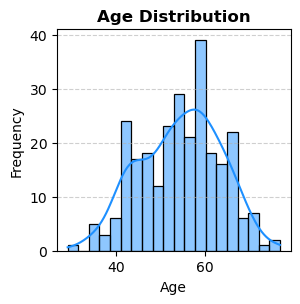

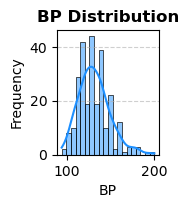

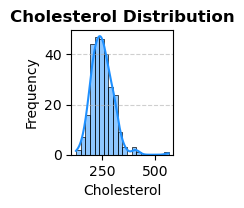

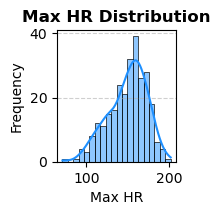

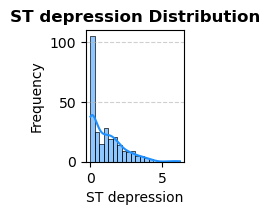

In [10]:
# Feature Distributions Histograms
numerical_features = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']
plt.figure(figsize=(12, 8))

for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[feature], bins=20, kde=True, color="dodgerblue")
    plt.title(f"{feature} Distribution", fontsize=12, fontweight='bold')
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)  # Centering adjustment
    plt.savefig(os.path.join(figures_dir, f"{feature}_Distribution.png"))  
    plt.show()

## 🎯 Target Variable Analysis (Heart Disease Presence vs. Absence)

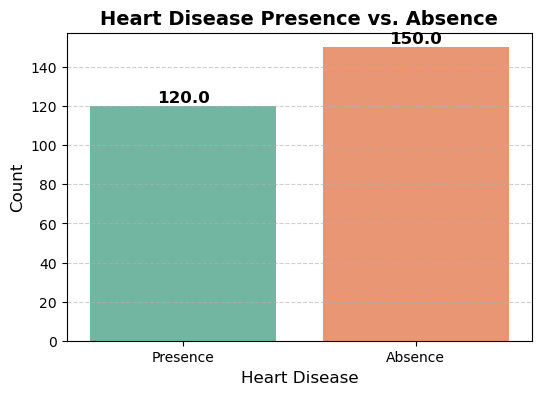

In [5]:
# Count plot for heart disease presence vs. absence
plt.figure(figsize=(6, 4))
ax = sns.countplot(x="Heart Disease", data=df, palette="Set2")
plt.title("Heart Disease Presence vs. Absence", fontsize=14, fontweight='bold')
plt.xlabel("Heart Disease", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Add count labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2, p.get_height() + 2), 
                ha='center', fontsize=12, fontweight='bold')
    save_path = os.path.join(figures_dir, f"{feature}_Distribution.png")
    plt.savefig(save_path)  # Correct way to save

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.savefig(os.path.join(figures_dir, "Heart_Disease_Distribution.png"))  # Fixed
plt.show()

## 📈 Numerical Feature Distributions by Heart Disease Status

<Figure size 1200x800 with 0 Axes>

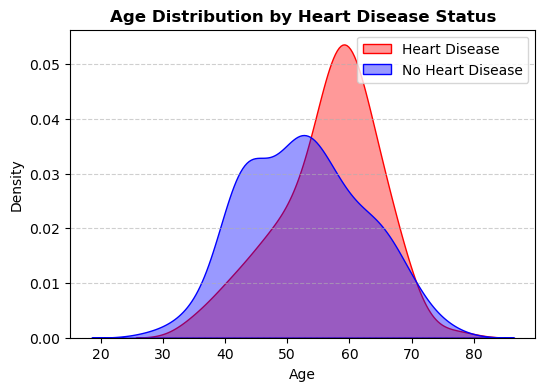

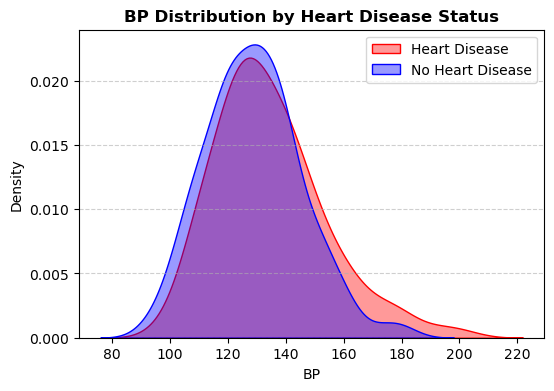

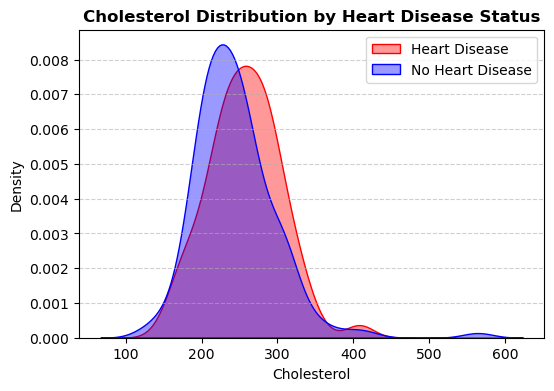

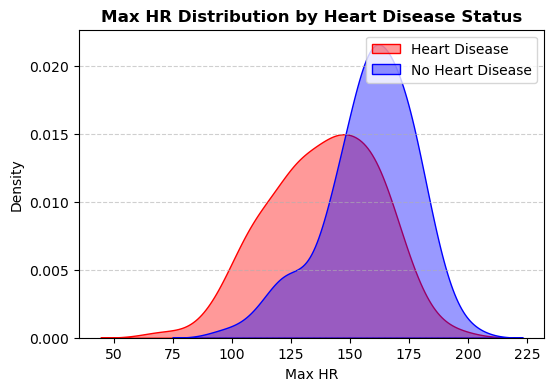

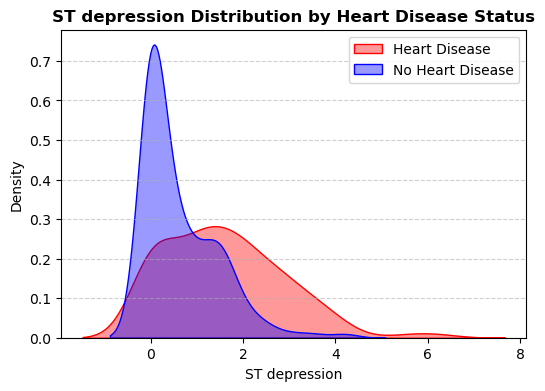

In [6]:
# Select numerical features
plt.figure(figsize=(12, 8))

for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(df[df["Heart Disease"] == "Presence"][feature], label="Heart Disease", fill=True, alpha=0.4, color='red')
    sns.kdeplot(df[df["Heart Disease"] == "Absence"][feature], label="No Heart Disease", fill=True, alpha=0.4, color='blue')
    plt.title(f"{feature} Distribution by Heart Disease Status", fontsize=12, fontweight='bold')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.savefig(os.path.join(figures_dir, f"{feature}_Distribution.png"))  
    plt.show()

## 📊 Categorical Feature Analysis

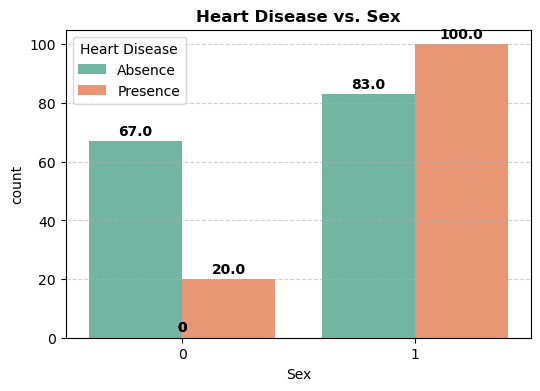

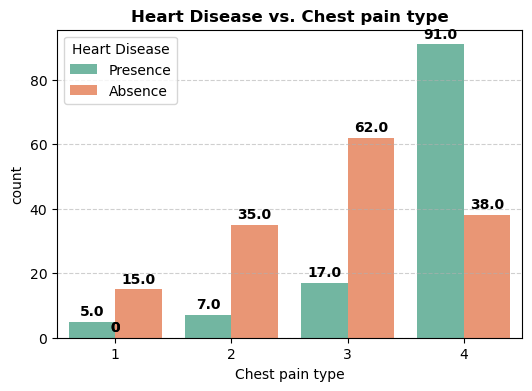

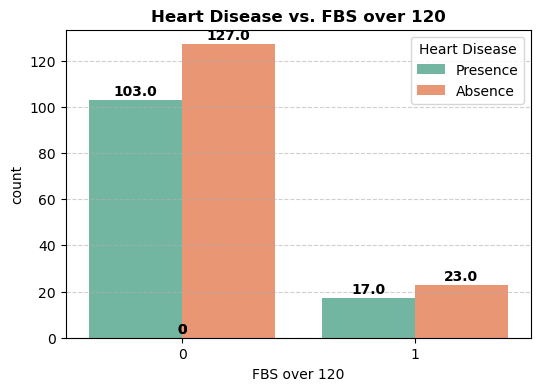

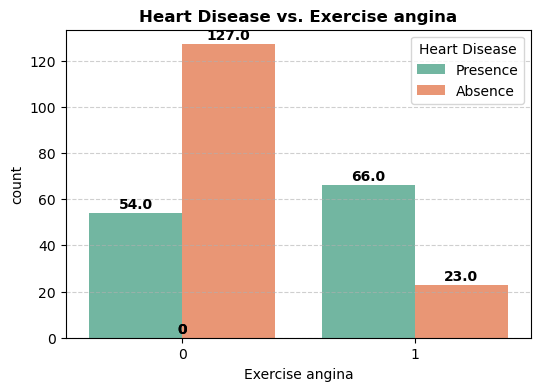

In [7]:
# Select categorical features
categorical_features = ["Sex", "Chest pain type", "FBS over 120", "Exercise angina"]

for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(x=feature, hue="Heart Disease", data=df, palette="Set2")
    plt.title(f"Heart Disease vs. {feature}", fontsize=12, fontweight='bold')
    plt.legend(title="Heart Disease", fontsize=10)
    
    # Add count labels
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2, p.get_height() + 2), 
                    ha='center', fontsize=10, fontweight='bold')

    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.savefig(os.path.join(figures_dir, f"{feature}_vs_Heart_Disease.png"))  
    plt.show()

## 🔥 Correlation Analysis (Feature Relationships)

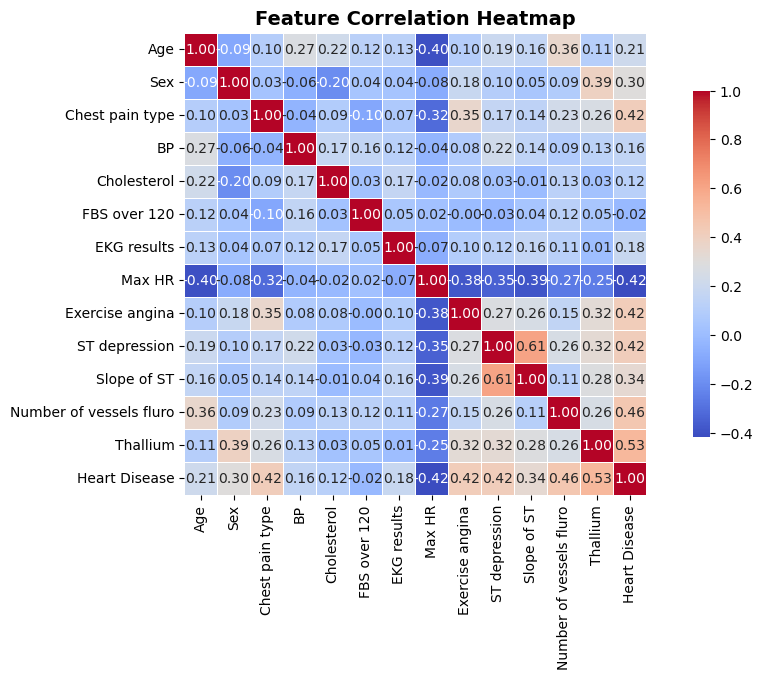

In [8]:
# Convert categorical target variable to numeric (if not already encoded)
df["Heart Disease"] = df["Heart Disease"].map({"Presence": 1, "Absence": 0})

# Select only numerical columns for correlation analysis
numerical_features = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numerical_features.corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True, cbar_kws={"shrink": 0.75})
plt.title("Feature Correlation Heatmap", fontsize=14, fontweight='bold')
plt.savefig(os.path.join(figures_dir, "Feature_Correlation_Heatmap.png"))  
plt.show()

## 🚨 Outlier Detection (No Removal)

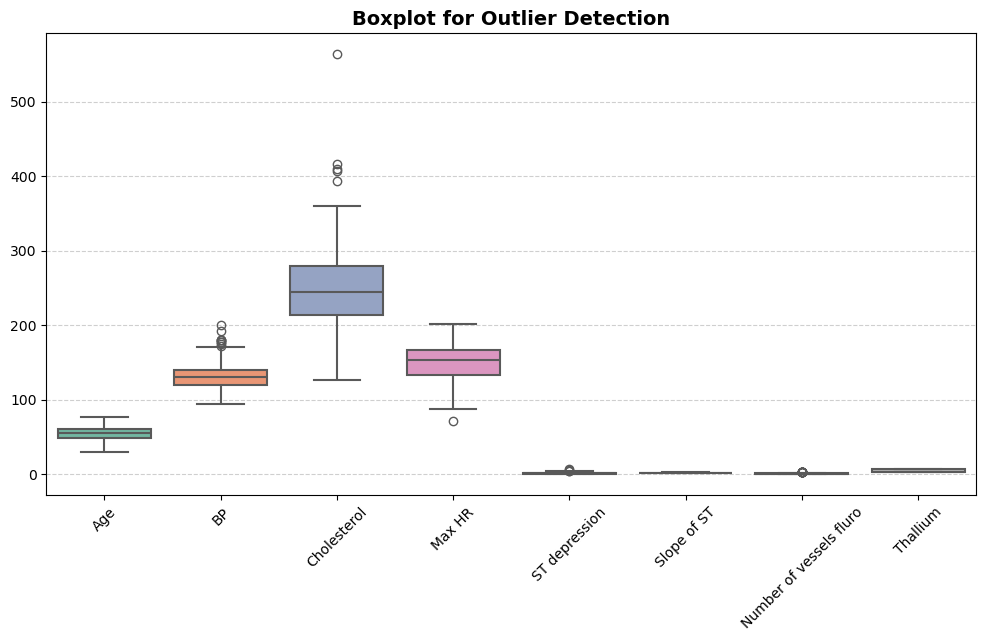

In [9]:
# Define binary categorical columns that should be excluded
binary_cols = ["Sex", "Chest pain type", "EKG results", "FBS over 120", "Exercise angina", "Heart Disease"]

# Select only continuous numerical columns (exclude binary categorical columns)
continuous_features = [col for col in df.select_dtypes(include=[np.number]).columns if col not in binary_cols]

# Boxplots for numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[continuous_features], palette="Set2", linewidth=1.5)
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection", fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.savefig(os.path.join(figures_dir, "Outlier_Detection_Boxplot.png"))  
plt.show()